# Лабораторная работа №2

**Выполнили:**
* Новичков Дмитрий 438329
* Чемякин Андрей 285610
* Васильев Василий 367963

In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings


warnings.filterwarnings("ignore", category=FutureWarning)

## Датасет №1. Air Quality and Pollution Assessment

### Загрузим датасет

In [2]:
url = 'https://drive.google.com/uc?id=1w-R855o8GegnRptuiiQnmAhLgyFTpe3L'
data_classification = pd.read_csv(url)

data_classification.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


### Препроцессинг и отбор признаков

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif


data_classification.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [6]:
data_classification.drop_duplicates(keep='first',inplace=True)
data_classification.isnull().any()

,0
Temperature,False
Humidity,False
PM2.5,False
PM10,False
NO2,False
SO2,False
CO,False
Proximity_to_Industrial_Areas,False
Population_Density,False
Air Quality,False


In [7]:
le = LabelEncoder()
data_classification['Air Quality'] = le.fit_transform(data_classification['Air Quality'])

In [8]:
data_classification.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 390.8 KB


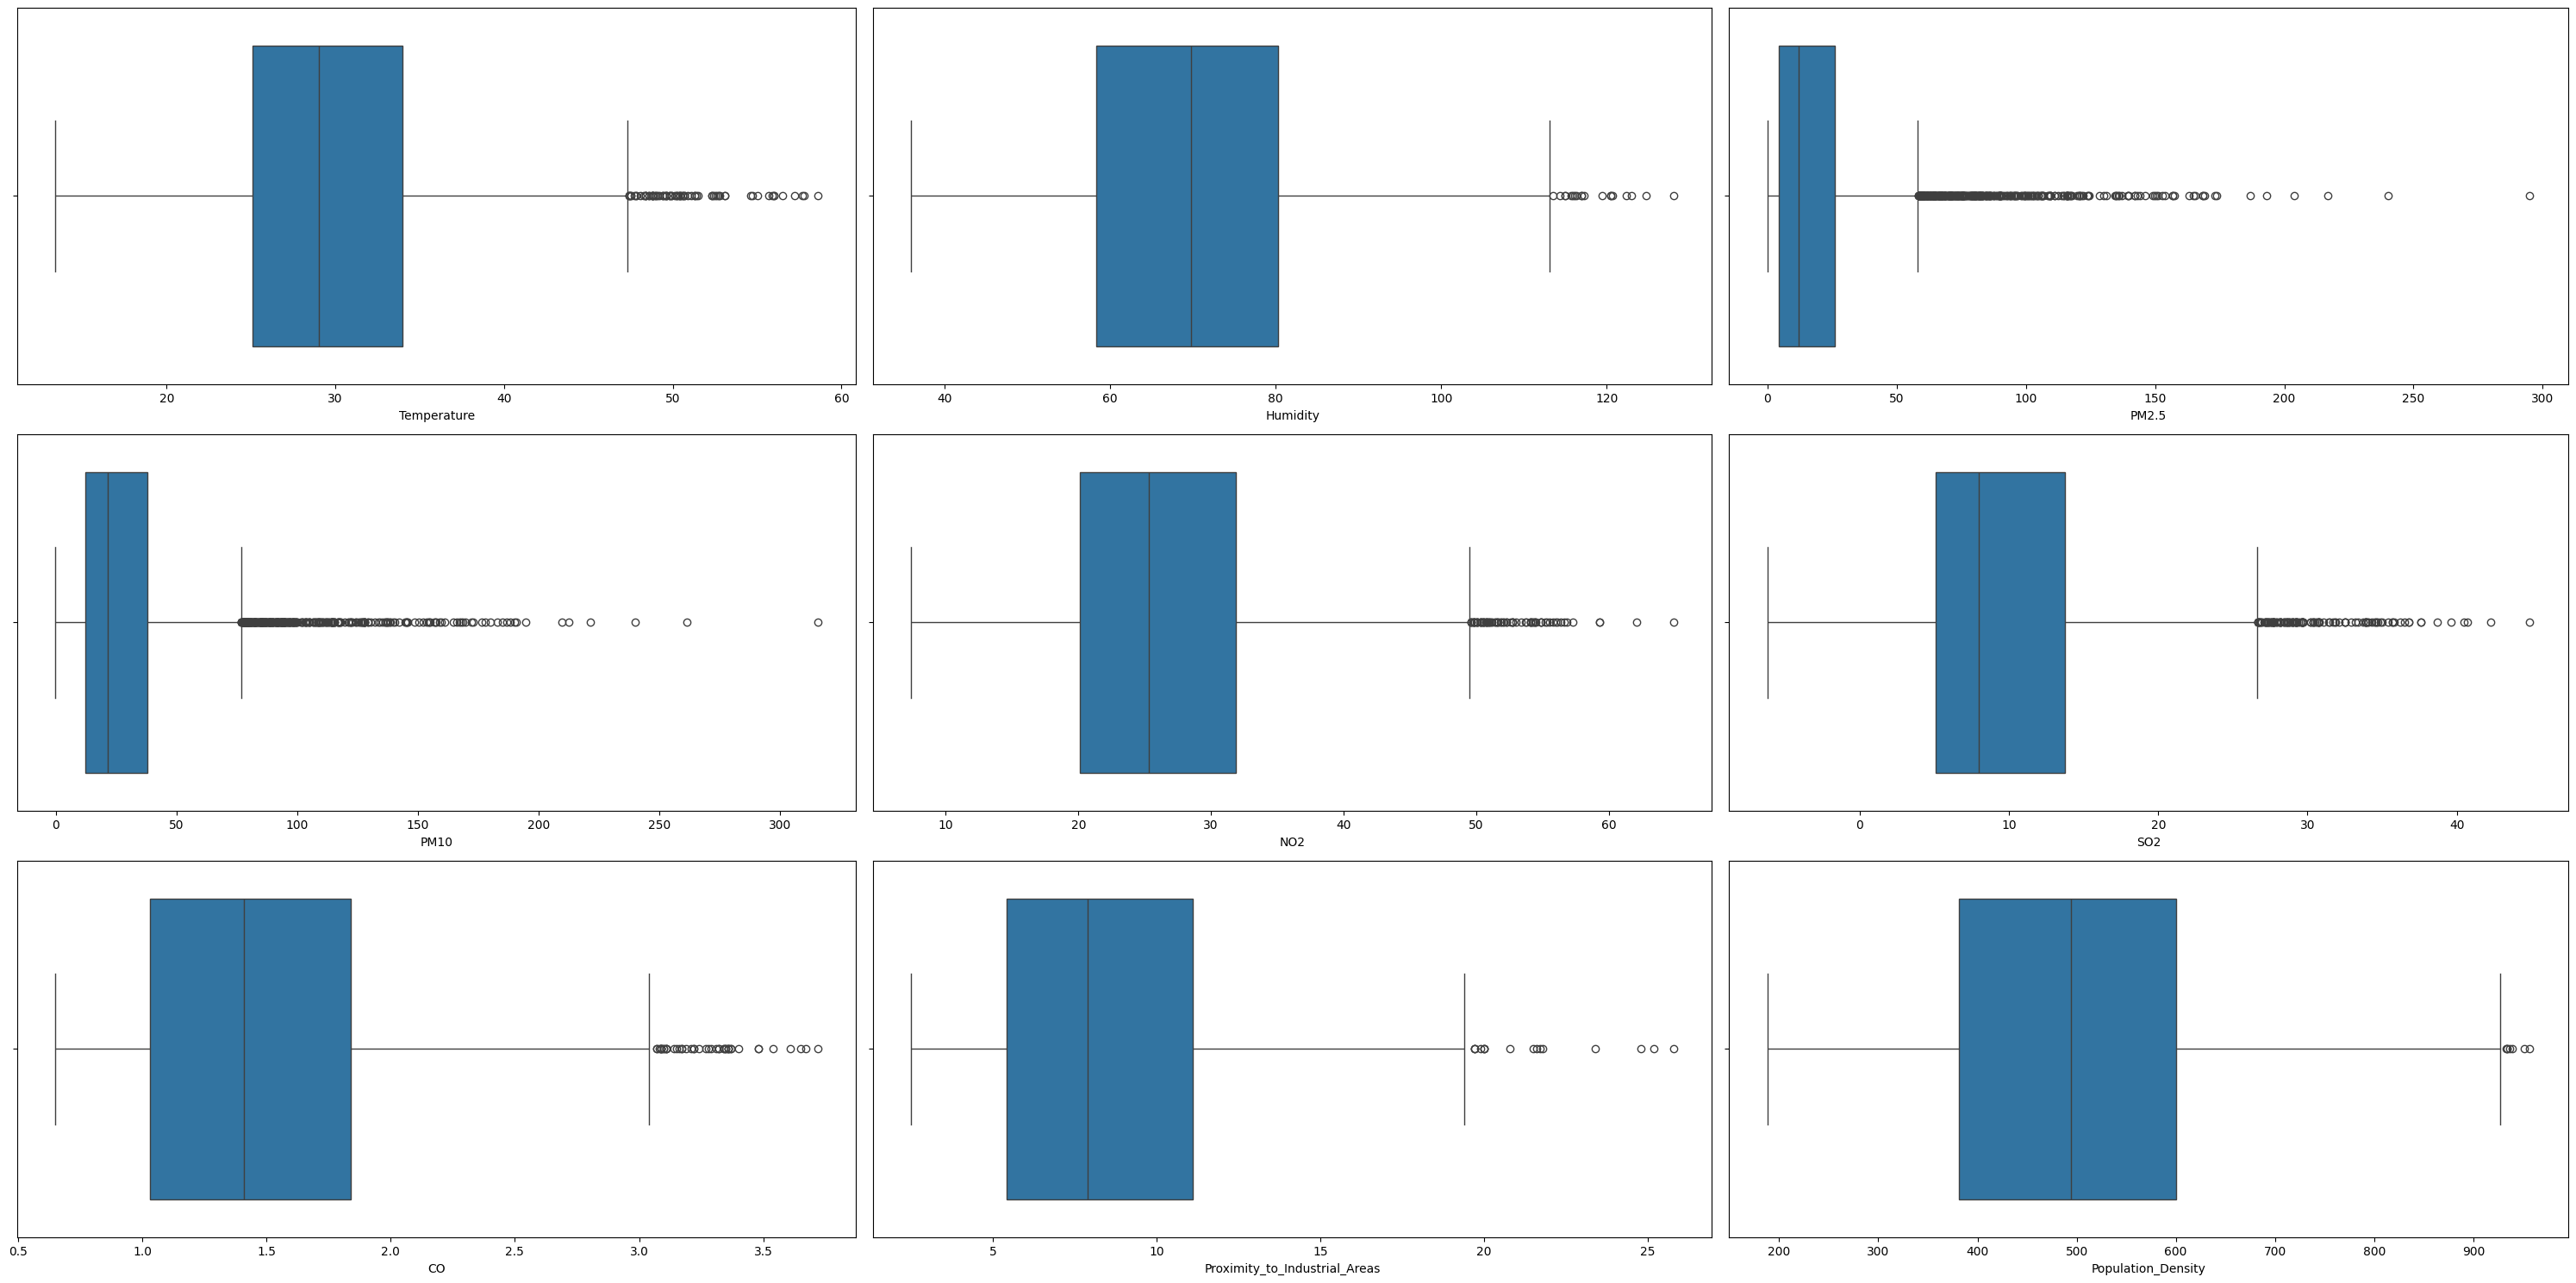

In [9]:
fig,ax = plt.subplots(3,3,figsize=(30,15))
ax = ax.flatten()
i = 0

for col in data_classification.columns:
    if col!='Air Quality' and i<9:
        sns.boxplot(data=data_classification, x=col, ax=ax[i])
        i+=1

plt.tight_layout()
plt.show()

In [10]:
for col in data_classification.drop(columns='Air Quality').columns:
    q1=np.quantile(data_classification[col],0.25)
    q3=np.quantile(data_classification[col],0.75)
    iqr=q3-q1
    lb=q1-iqr*1.5
    ub=q3+iqr*1.5
    data_classification=data_classification[(data_classification[col]>=lb)&(data_classification[col]<=ub)]

In [11]:
data_classification.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4158 entries, 0 to 4998
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    4158 non-null   float64
 1   Humidity                       4158 non-null   float64
 2   PM2.5                          4158 non-null   float64
 3   PM10                           4158 non-null   float64
 4   NO2                            4158 non-null   float64
 5   SO2                            4158 non-null   float64
 6   CO                             4158 non-null   float64
 7   Proximity_to_Industrial_Areas  4158 non-null   float64
 8   Population_Density             4158 non-null   int64  
 9   Air Quality                    4158 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 357.3 KB


In [13]:
corr_matrix = data_classification.drop(columns='Air Quality').corr().abs()
upper_triangle = corr_matrix.where(
        np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
    )
to_drop = [column for column in upper_triangle.columns if (upper_triangle[column] > 0.8).sum() > 0]
data_classification.drop(columns=to_drop, inplace=True)

In [14]:
data_classification.head(5)

,Temperature,Humidity,PM2.5,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,18.9,9.2,1.72,6.3,319,2
1,28.3,75.6,2.3,30.8,9.7,1.64,6.0,611,2
2,23.1,74.7,26.7,24.4,12.6,1.63,5.2,619,2
3,27.1,39.1,6.1,13.5,5.3,1.15,11.1,551,0
4,26.5,70.7,6.9,21.9,5.6,1.01,12.7,303,0


### Разделение данных

In [16]:
from sklearn.model_selection import train_test_split

X = data_classification.drop(columns='Air Quality')
y = data_classification['Air Quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2910, 8) (2910,) (1248, 8) (1248,)


In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Классификация с разными функциями потерь и методами регуляризации

#### Функции потерь

1. **Perceptron Loss**  
Используется в классическом перцептроне:
$$
\text{Perceptron}(y, \hat{y}) =
\begin{cases}
0, & y \cdot \hat{y} \geq 0 \\
-y \cdot \hat{y}, & y \cdot \hat{y} < 0
\end{cases}
$$

2. **Hinge Loss**  
Популярна для SVM:  
$$
\text{Hinge}(y, \hat{y}) = \max(0, 1 - y \cdot \hat{y})
$$

3. **Squared Hinge Loss**  
Квадратичная версия `Hinge`:  
$$
\text{SquaredHinge}(y, \hat{y}) = \left( \max(0, 1 - y \cdot \hat{y}) \right)^2
$$

In [46]:
from sklearn.linear_model import SGDClassifier
from sklearn.exceptions import ConvergenceWarning


clf_perceptron = SGDClassifier(loss='perceptron', penalty='l2', max_iter=1000, random_state=42)
clf_perceptron.fit(X_train, y_train)

clf_hinge = SGDClassifier(loss='hinge', penalty='l2', max_iter=1000, random_state=42)
clf_hinge.fit(X_train, y_train)

clf_squared_hinge = SGDClassifier(loss='squared_hinge', penalty='l2', max_iter=1000, random_state=42)
clf_squared_hinge.fit(X_train, y_train)

SGDClassifier(loss='squared_hinge', random_state=42)

In [47]:
from sklearn.model_selection import GridSearchCV

warnings.filterwarnings("ignore", category=ConvergenceWarning)


param_grid_clf = {
    'loss': ['hinge', 'squared_hinge', 'perceptron'],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'alpha': np.linspace(1e-4, 1, 100)
}

grid_clf = GridSearchCV(SGDClassifier(max_iter=1000, tol=1e-4), param_grid=param_grid_clf, cv=5)
grid_clf.fit(X_train, y_train)

print(f"Лучшие параметры классификации: {grid_clf.best_params_}")

Лучшие параметры классификации: {'alpha': 0.19199999999999998, 'loss': 'perceptron', 'penalty': 'l2'}


### Оценка классификации
####**Метрики для классификации**

#### Основные метрики
1. **Accuracy (Точность)**  
$$
\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
$$
   - Подходит для сбалансированных данных.

2. **Precision (Точность по классу)**  
$$
\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
$$
   - Указывает, насколько точно модель классифицирует положительный класс.

3. **Recall (Полнота)**  
$$
\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$
   - Показывает долю найденных положительных объектов из всех положительных.

4. **F1-Score** (Гармоническое среднее Precision и Recall):
$$
\text{F1} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

5. **ROC AUC (Площадь под кривой ROC)**  
$$
\text{AUC} = \int_0^1 \text{TPR}(x) \, dx
$$
   - Удобна для оценки бинарной классификации.

In [56]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

warnings.filterwarnings("ignore")


clf = grid_clf.best_estimator_
y_pred = clf.predict(X_test)

calibrated_clf = CalibratedClassifierCV(estimator=clf, cv="prefit")
calibrated_clf.fit(X_train, y_train)


acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
auc = roc_auc_score(y_test, calibrated_clf.predict_proba(X_test), average="macro", multi_class="ovr")

print(f"Accuracy: {acc:.2f}, Precision: {prec:.2f}, Recall: {rec:.2f}, F1: {f1:.2f}, AUC: {auc:.2f}")

Accuracy: 0.92, Precision: 0.92, Recall: 0.69, F1: 0.70, AUC: 0.98


Testing Evaluation Metrics:
Accuracy:  0.9182692307692307
Precision:  0.9191707745653366
Recall:  0.6899462064571671
F1 Score:  0.6977098623921025

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       601
           1       1.00      0.06      0.11        34
           2       0.85      0.99      0.92       394
           3       0.83      0.72      0.77       219

    accuracy                           0.92      1248
   macro avg       0.92      0.69      0.70      1248
weighted avg       0.92      0.92      0.91      1248


Confusion Matrix: 



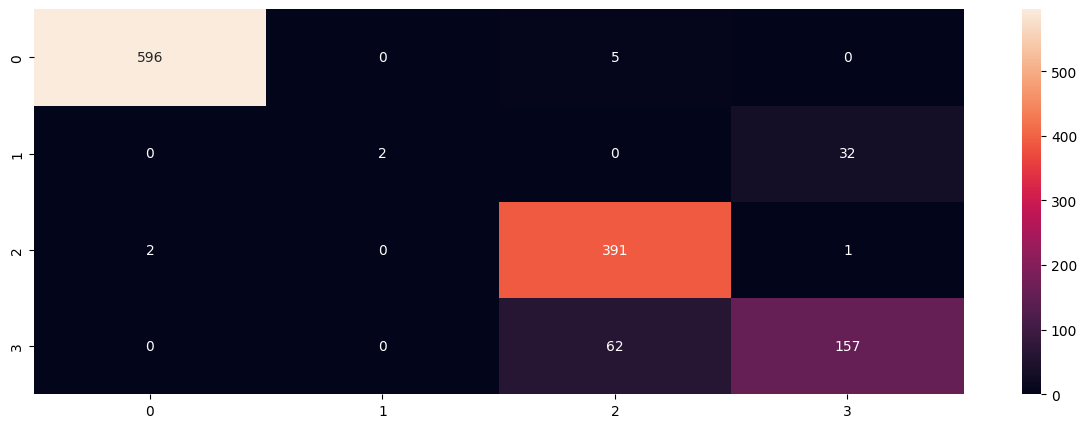

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

print("Testing Evaluation Metrics:")
print("Accuracy: ",accuracy_score(y_test, y_pred))
print("Precision: ",precision_score(y_test, y_pred, average='macro'))
print("Recall: ",recall_score(y_test, y_pred, average='macro'))
print("F1 Score: ",f1_score(y_test, y_pred, average='macro'))
print("\nClassification Report: \n",classification_report(y_test, y_pred))
print("\nConfusion Matrix: \n")
plt.figure(figsize=(15,5))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt='d')
plt.show()

In [55]:
batch_size = 100

clf = SGDClassifier(loss='squared_hinge', max_iter=1, tol=None, warm_start=True)

classes = np.unique(y)

for i in range(0, len(X_train), batch_size):
    X_batch = X_train[i:i + batch_size]
    y_batch = y_train[i:i + batch_size]
    clf.partial_fit(X_batch, y_batch, classes=classes)

y_pred = clf.predict(X_test)
print("Testing Evalaution Metrics:")
print("Accuracy: ",accuracy_score(y_test, y_pred))
print("Precision: ",precision_score(y_test, y_pred, average='macro'))
print("Recall: ",recall_score(y_test, y_pred, average='macro'))
print("F1 Score: ",f1_score(y_test, y_pred, average='macro'))
print("\nClassification Report: \n",classification_report(y_test, y_pred))

Testing Evalaution Metrics:
Accuracy:  0.8229166666666666
Precision:  0.5821508515551836
Recall:  0.5473959543973698
F1 Score:  0.5329907792723598

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       601
           1       0.00      0.00      0.00        34
           2       0.68      0.95      0.79       394
           3       0.68      0.24      0.36       219

    accuracy                           0.82      1248
   macro avg       0.58      0.55      0.53      1248
weighted avg       0.80      0.82      0.79      1248



## Датасет №2. Prediction of Insurance Charges

### Загрузим датасет

In [51]:
url = 'https://drive.google.com/uc?id=1KDIhpV8oJHvMckXSoKkIOSP9tKGuqWCr'
data_regression = pd.read_csv(url)

data_regression.head()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


### Препроцессинг и отбор признаков

In [58]:
le = LabelEncoder()

data_regression['smoker'] = le.fit_transform(data_regression['smoker'])
data_regression['sex'] = le.fit_transform(data_regression['sex'])
data_regression['region'] = le.fit_transform(data_regression['region'])

In [59]:
data_regression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   int64  
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   int64  
 6   region    1338 non-null   int64  
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


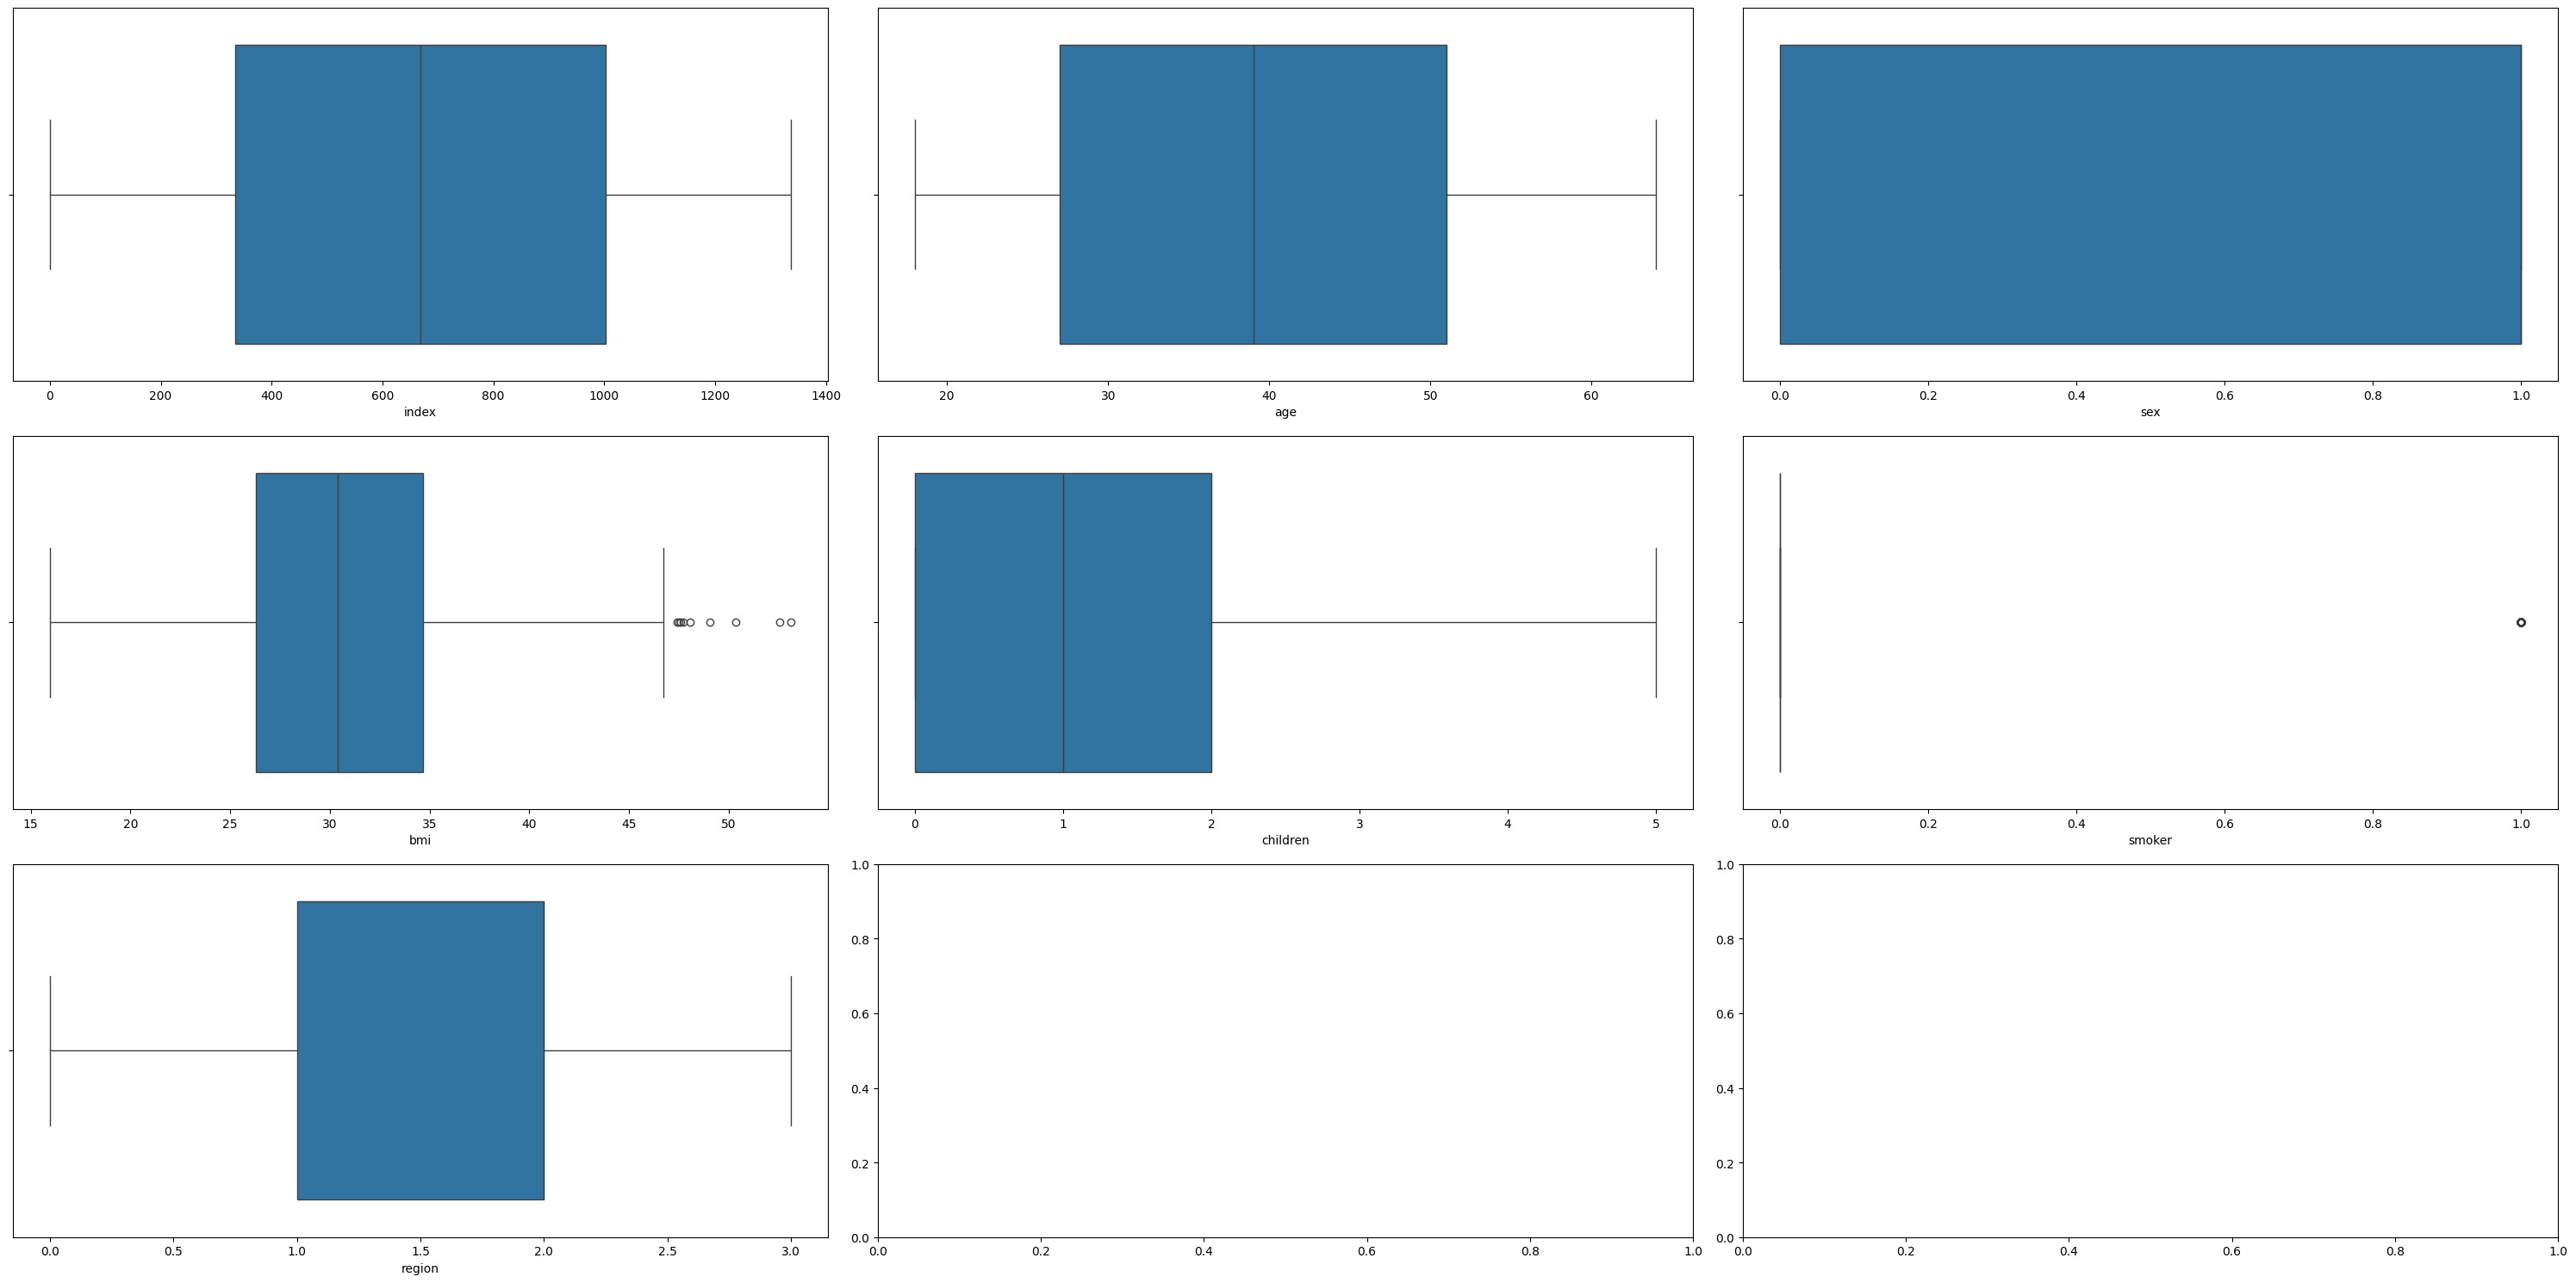

In [60]:
fig,ax = plt.subplots(3,3,figsize=(30,15))
ax = ax.flatten()
i = 0

for col in data_regression.columns:
    if col!='charges' and i<9:
        sns.boxplot(data=data_regression, x=col, ax=ax[i])
        i+=1

plt.tight_layout()
plt.show()

<Axes: title={'center': 'Charges amount distribution per sex'}, xlabel='charges', ylabel='Count'>

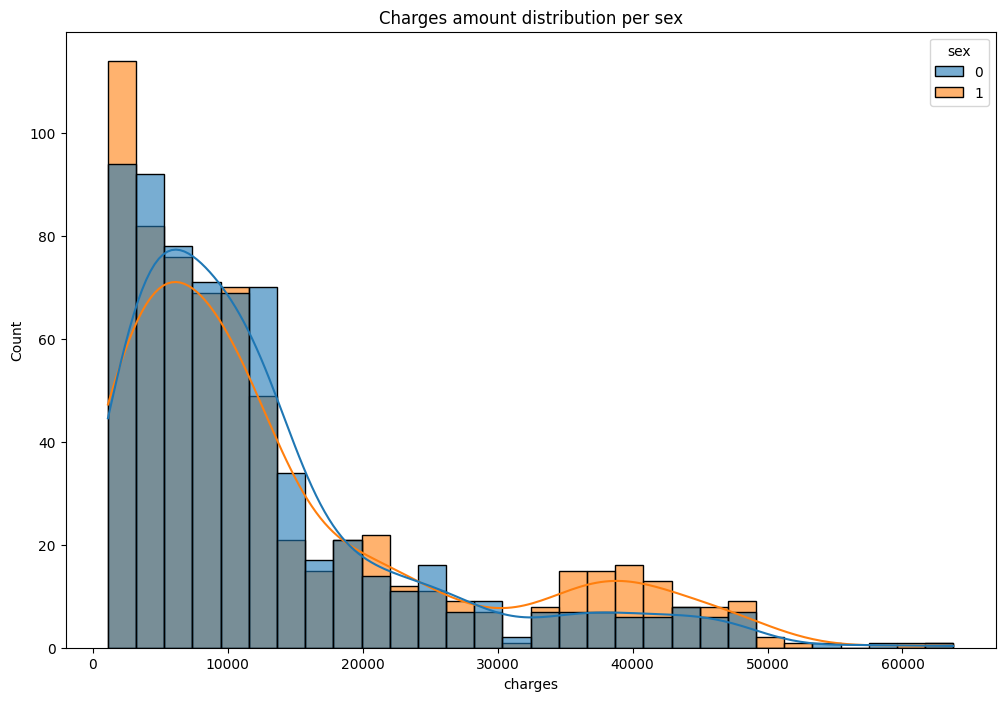

In [61]:
plt.figure(figsize=(12,8))
plt.title('Charges amount distribution per sex')
sns.histplot(data_regression, x='charges', hue="sex", kde=True, alpha=0.6, linewidth=1)

In [62]:
spheres = ['age', 'children']

for i in range(len(spheres)):
    col1 = spheres[i]
    for j in range(len(spheres)):
        col2 = spheres[j]
        data_regression[f"{col1}_{col2}"] = data_regression[f"{col}"] * data_regression[f"{col2}"]
data_regression.head()

,index,age,sex,bmi,children,smoker,region,charges,age_age,age_children,children_age,children_children
0,0,19,0,27.900,0,1,3,16884.92400,320813.55600,0.0000,320813.55600,0.0000
1,1,18,1,33.770,1,0,2,1725.55230,31059.94140,1725.5523,31059.94140,1725.5523
2,2,28,1,33.000,3,0,2,4449.46200,124584.93600,13348.3860,124584.93600,13348.3860
3,3,33,1,22.705,0,0,1,21984.47061,725487.53013,0.0000,725487.53013,0.0000
4,4,32,1,28.880,0,0,1,3866.85520,123739.36640,0.0000,123739.36640,0.0000


In [63]:
for col in data_regression.drop(columns='charges').columns:
    q1 = np.quantile(data_regression[col],0.25)
    q3 = np.quantile(data_regression[col],0.75)
    iqr = q3-q1
    lb = q1-iqr*1.5
    ub = q3+iqr*1.5
    data_regression = data_regression[(data_regression[col]>=lb) & (data_regression[col]<=ub)]

In [64]:
data_regression.info()

<class 'pandas.core.frame.DataFrame'>
Index: 929 entries, 1 to 1336
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              929 non-null    int64  
 1   age                929 non-null    int64  
 2   sex                929 non-null    int64  
 3   bmi                929 non-null    float64
 4   children           929 non-null    int64  
 5   smoker             929 non-null    int64  
 6   region             929 non-null    int64  
 7   charges            929 non-null    float64
 8   age_age            929 non-null    float64
 9   age_children       929 non-null    float64
 10  children_age       929 non-null    float64
 11  children_children  929 non-null    float64
dtypes: float64(6), int64(6)
memory usage: 94.4 KB


In [65]:
data_regression.drop_duplicates(keep='first',inplace=True)

In [66]:
data_regression.isnull().any()

,0
index,False
age,False
sex,False
bmi,False
children,False
smoker,False
region,False
charges,False
age_age,False
age_children,False


In [67]:
corr_matrix = data_regression.drop(columns='charges').corr().abs()
upper_triangle = corr_matrix.where(
        np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
    )
to_drop = [column for column in upper_triangle.columns if (upper_triangle[column] > 0.8).sum() > 0]
data_regression.drop(columns=to_drop, inplace=True)

In [68]:
data_regression.head(5)

,index,age,sex,bmi,children,smoker,region,charges
1,1,18,1,33.770,1,0,2,1725.55230
2,2,28,1,33.000,3,0,2,4449.46200
3,3,33,1,22.705,0,0,1,21984.47061
4,4,32,1,28.880,0,0,1,3866.85520
5,5,31,0,25.740,0,0,2,3756.62160


### Разделим данные

In [93]:
from sklearn.model_selection import train_test_split

X = data_regression.drop(columns='charges')
y = data_regression['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(650, 8) (650,) (279, 8) (279,)


In [96]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Регрессия с разными функциями потерь и методами регуляризации

#### Функции потерь

1. **Squared Error Loss**  
Основная функция для регрессии:  
$$
\text{SquaredError}(y, \hat{y}) = \frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2
$$

2. **Huber Loss**  
Устойчива к выбросам:  
$$
\text{Huber}(y, \hat{y}) =
\begin{cases}
\frac{1}{2}(y - \hat{y})^2, & \text{если } |y - \hat{y}| \leq \delta \\
\delta \cdot |y - \hat{y}| - \frac{1}{2}\delta^2, & \text{если } |y - \hat{y}| > \delta
\end{cases}
$$

3. **Epsilon-Insensitive Loss**  
Игнорирует ошибки меньше $\epsilon$:  
$$
\text{EpsilonInsensitive}(y, \hat{y}) =
\begin{cases}
0, & |y - \hat{y}| \leq \epsilon \\
|y - \hat{y}| - \epsilon, & |y - \hat{y}| > \epsilon
\end{cases}
$$

#### 1.5.2 Регуляризация
Регуляризация уменьшает вероятность переобучения.

- **L2-регуляризация (Ridge)**:
$$
\Omega(w) = \frac{1}{2} \|w\|^2
$$
  Штрафует большие значения весов.

- **L1-регуляризация (Lasso)**:
$$
\Omega(w) = \|w\|_1
$$
  Способствует разреженности.

- **ElasticNet**: комбинация L1 и L2:
$$
\Omega(w) = \alpha \|w\|_1 + \frac{1 - \alpha}{2} \|w\|^2
$$

In [97]:
from sklearn.linear_model import SGDRegressor


reg_squared = SGDRegressor(loss='squared_error', penalty='l2', max_iter=1000, random_state=42)
reg_squared.fit(X_train, y_train)

reg_huber = SGDRegressor(loss='huber', penalty='l2', max_iter=1000, random_state=42)
reg_huber.fit(X_train, y_train)

reg_epsilon = SGDRegressor(loss='epsilon_insensitive', penalty='l2', max_iter=1000, random_state=42)
reg_epsilon.fit(X_train, y_train)

SGDRegressor(loss='epsilon_insensitive', random_state=42)

In [98]:
from sklearn.model_selection import GridSearchCV

param_grid_reg = {
    'loss': ['squared_error', 'huber', 'epsilon_insensitive'],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'alpha': [0.0001, 0.01, 0.01]
}

grid_reg = GridSearchCV(SGDRegressor(max_iter=10000, tol=1e-6), param_grid=param_grid_reg, cv=5)
grid_reg.fit(X_train, y_train)

print(f"Лучшие параметры регрессии: {grid_reg.best_params_}")

Лучшие параметры регрессии: {'alpha': 0.01, 'loss': 'squared_error', 'penalty': 'l2'}


#### **Метрики для регрессии**

1. **Mean Squared Error (MSE)**  
$$
\text{MSE} = \frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2
$$
   - Наиболее популярна, но чувствительна к выбросам.

2. **Mean Absolute Error (MAE)**  
$$
\text{MAE} = \frac{1}{N} \sum_{i=1}^N |y_i - \hat{y}_i|
$$
   - Устойчива к выбросам.

3. **$R^2$ (Коэффициент детерминации)**  
$$
R^2 = 1 - \frac{\sum_{i=1}^N (y_i - \hat{y}_i)^2}{\sum_{i=1}^N (y_i - \bar{y})^2}
$$
   - Показывает, насколько хорошо модель объясняет разброс данных.

In [99]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

best_grid_reg = grid_reg.best_estimator_

y_pred = best_grid_reg.predict(X_test)
mse_squared = mean_squared_error(y_test, y_pred)
mae_squared = mean_absolute_error(y_test, y_pred)
r2_squared = r2_score(y_test, y_pred)

print(f"MSE: {mse_squared:.2f}, MAE: {mae_squared:.2f}, R^2: {r2_squared:.2f}")

MSE: 8543088.12, MAE: 1228.13, R^2: 0.55


In [81]:
data_regression['prediction'] = best_grid_reg.predict(X)

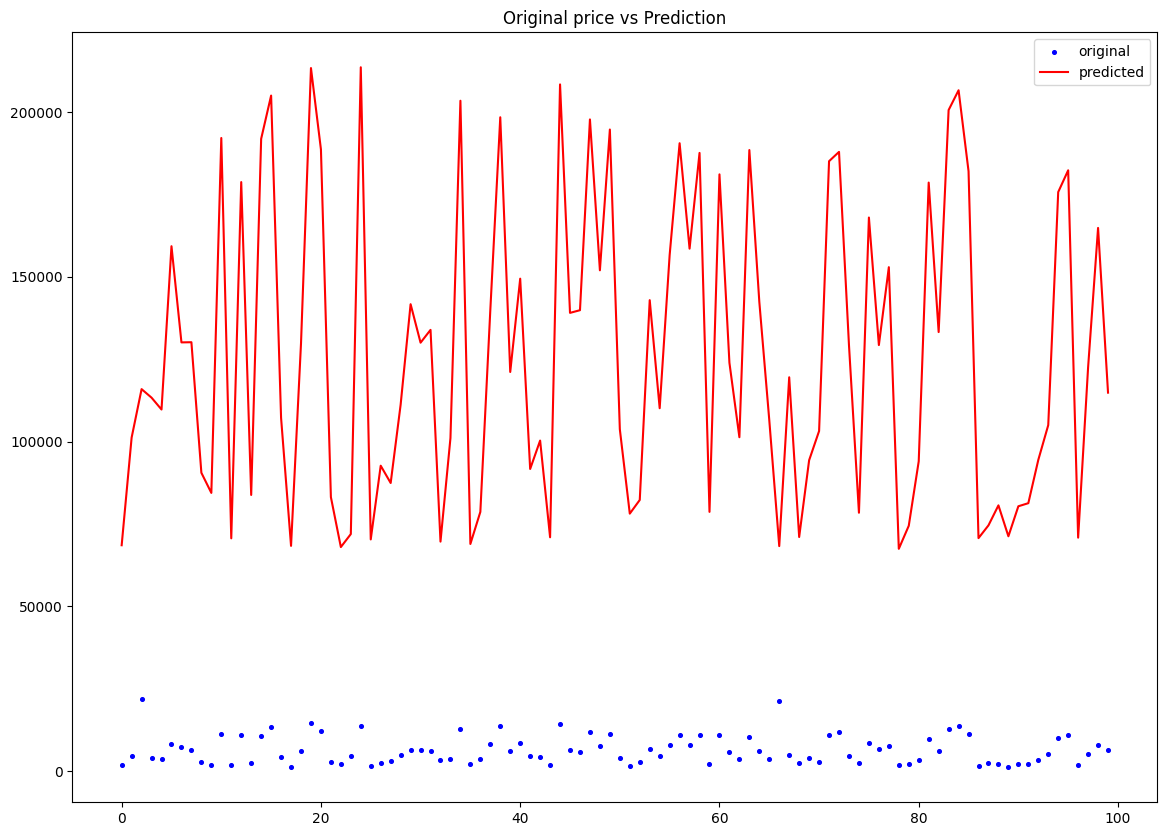

In [82]:
x_axis = range(len(data_regression['prediction'].head(100)))

plt.figure(figsize=(14,10))
plt.title('Original price vs Prediction')
plt.scatter(x_axis, data_regression['charges'].head(100), s=7, color="blue", label="original")
plt.plot(x_axis, data_regression['prediction'].head(100), lw=1.5, color="red", label="predicted")
plt.legend()
plt.show()

In [101]:
batch_size = 100

clf = SGDRegressor(loss='squared_error', max_iter=1, tol=None, warm_start=True)

for i in range(0, len(X_train), batch_size):
    X_batch = X_train[i:i + batch_size]
    y_batch = y_train[i:i + batch_size]
    clf.partial_fit(X_batch, y_batch)

y_pred = clf.predict(X_test)
mse_squared = mean_squared_error(y_test, y_pred)
mae_squared = mean_absolute_error(y_test, y_pred)
r2_squared = r2_score(y_test, y_pred)

print(f"MSE: {mse_squared:.2f}, MAE: {mae_squared:.2f}, R^2: {r2_squared:.2f}")

MSE: 10693647.07, MAE: 1504.76, R^2: 0.43
